In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

#### Importing the Data used in the analysis

In [2]:
data_path='fcc-forum-pageviews.csv'
df = pd.read_csv(data_path,index_col=0,parse_dates=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB
None


(-10000.0, 500000.0)

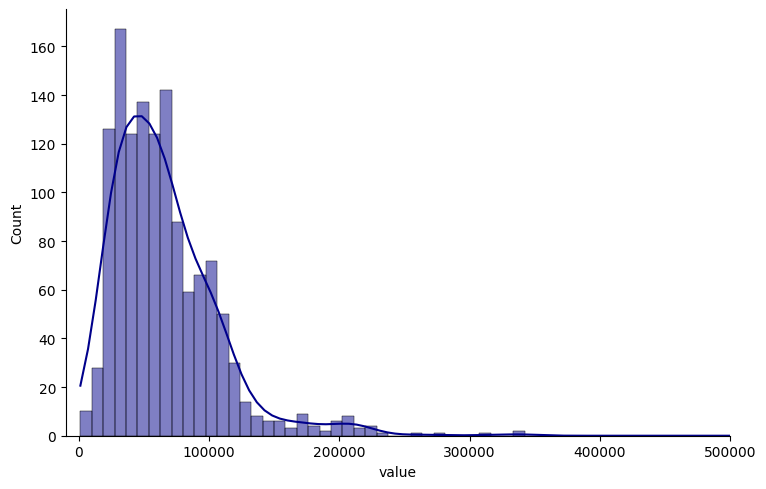

In [3]:
sns.displot(df,x='value',kde=True,aspect=1.5,color='darkblue')
plt.xlim(-10000,5e5)

#### Cleaning Data: Keeping only the records with page views between the 2.5th and 97.5th percentiles

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1238 entries, 2016-05-19 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1238 non-null   int64
dtypes: int64(1)
memory usage: 19.3 KB
None


(-10000.0, 500000.0)

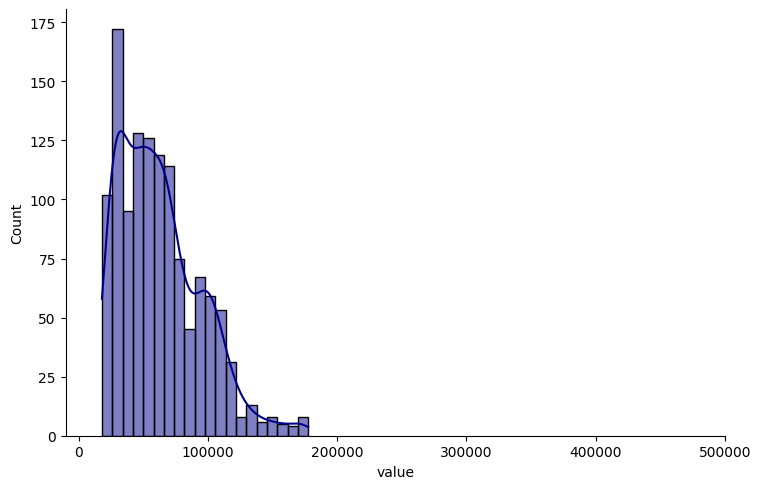

In [4]:
page_views_filter= (df['value']>=df['value'].quantile(0.025)) & (df['value']<=df['value'].quantile(0.975))
df = df.loc[page_views_filter]
print(df.info())
sns.displot(df,x='value',kde=True,aspect=1.5,color='darkblue')
plt.xlim(-10000,5e5)

#### Page views representation over time

Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

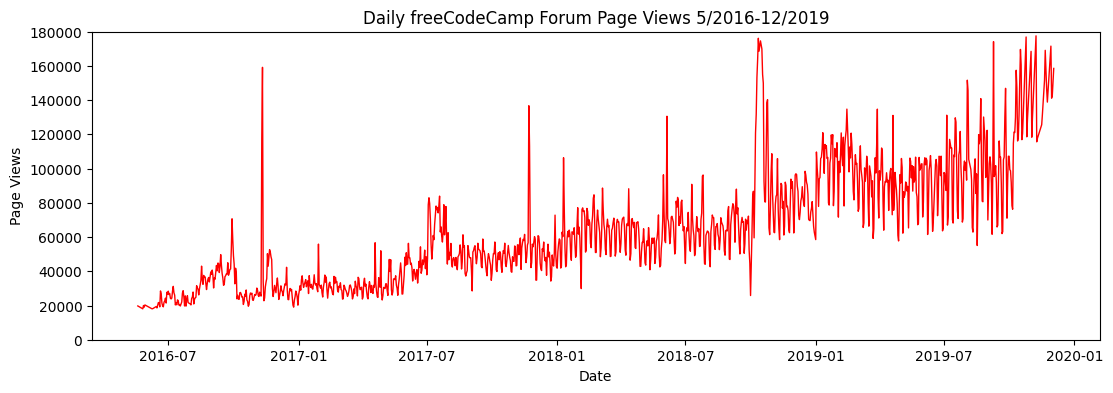

In [5]:
df_line=df.copy()
fig,ax= plt.subplots(figsize=(13,4))
ax.plot(df_line,c='red',linestyle='-',linewidth=1)
ax.set_ylabel('Page Views')
ax.set_ylim(0,180000)
ax.set_xlabel('Date')
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')


#### Average daily page views for each month grouped by year

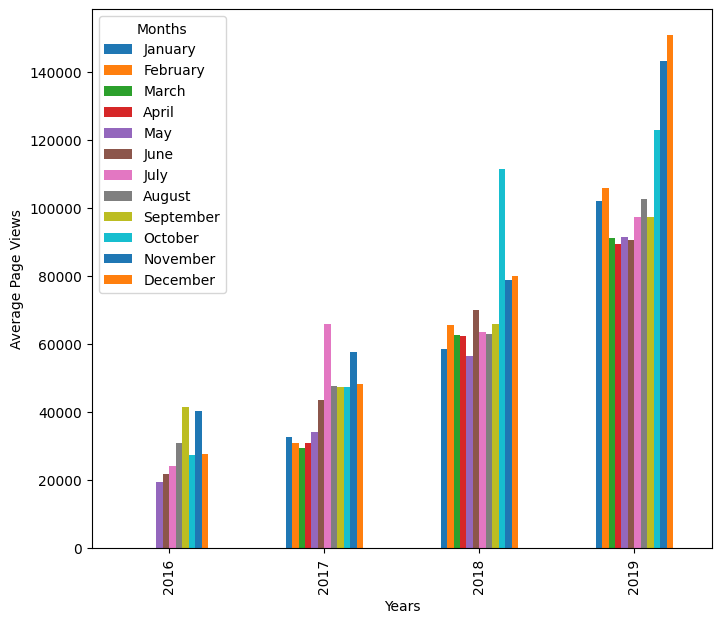

In [6]:
df_bar=df.copy()
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_bar['months'] = pd.Categorical(df_bar.index.strftime('%B'), categories=months, ordered=True)
df_bar_pivot=pd.pivot_table(data=df_bar,index=df_bar.index.year,columns='months',aggfunc='mean',observed=False)
fig= df_bar_pivot.plot(kind='bar', figsize=(8, 7), ylabel='Average Page Views', xlabel='Years')
plt.legend(months,loc='upper left', title='Months')

#### Page views distribution within a given year or month

[Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Page Views')]

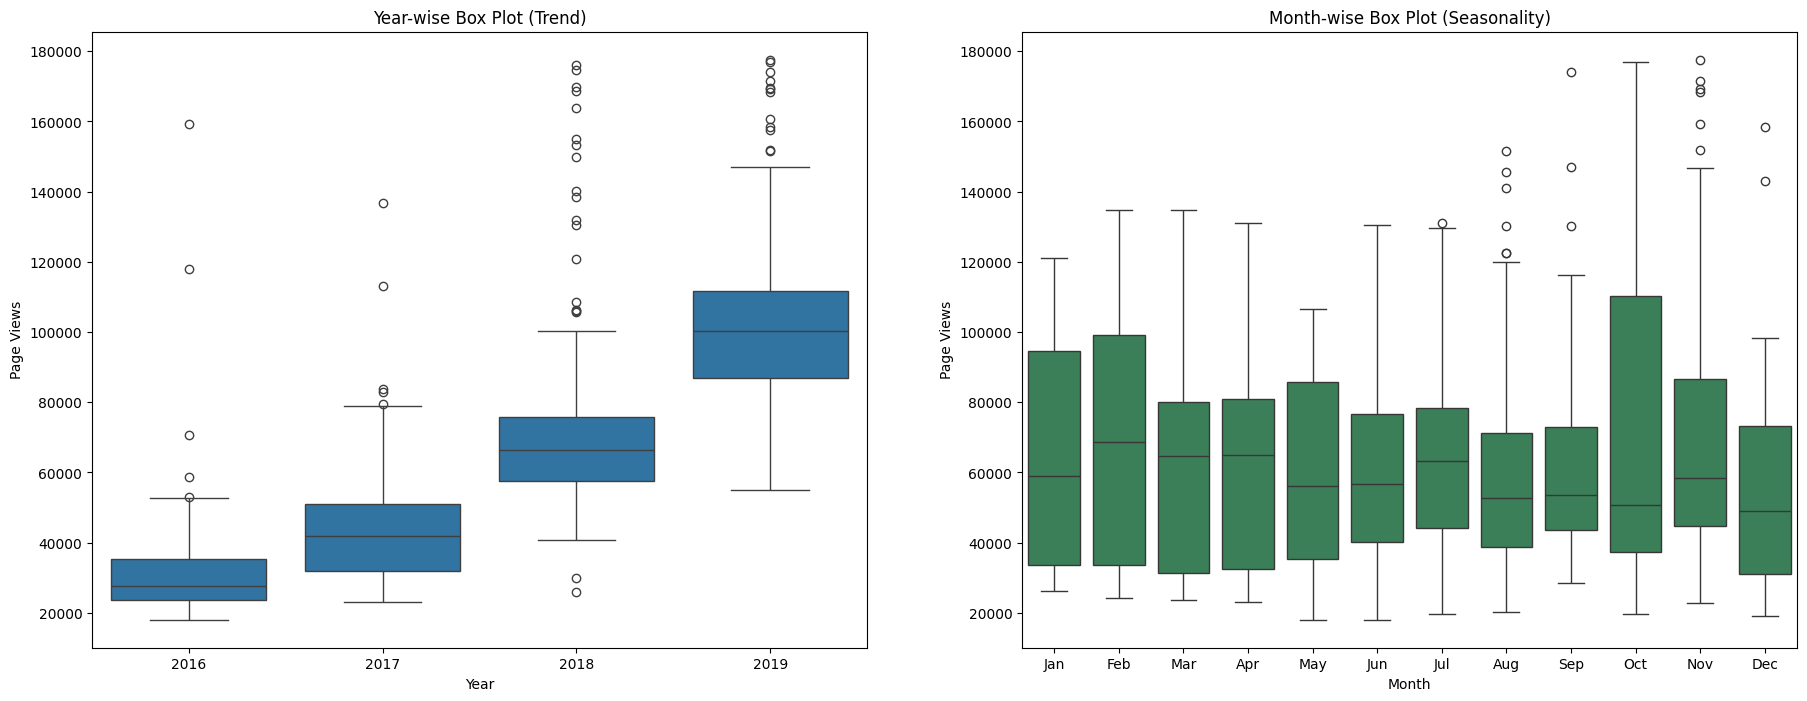

In [7]:
# Prepare data for box plots 
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

# Draw box plots (using Seaborn)
months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plot_objects=plt.subplots(1,2,figsize=(22,8))
fig,(ax1,ax2)=plot_objects
ax1=sns.boxplot(data=df_box,x='year',y='value', ax=ax1)
ax1.set(title='Year-wise Box Plot (Trend)',xlabel='Year',ylabel='Page Views')
ax2=sns.boxplot(data=df_box,x='month',y='value', ax=ax2,order=months_order,color='seagreen')
ax2.set(title='Month-wise Box Plot (Seasonality)',xlabel='Month',ylabel='Page Views')